In [1]:
import pandas as pd
import numpy as np
from random import randrange
from collections import Counter
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

There are 1.183.748 rows in total in each dataset. 

In [68]:
#quick row check for each part of the dataset
for i in ["train_date.csv", "train_numeric.csv", "train_categorical.csv"]:
    print('Number of rows for ' + i + ': {}'.format(sum(1 for row in open(i, 'r'))))

Number of rows for train_date.csv: 1183748
Number of rows for train_numeric.csv: 1183748
Number of rows for train_categorical.csv: 1183748


Each part of the dataset has a different number of columns. This will be explored in detail later on.

In [121]:
#quick column check for each part of the dataset
for i in ["train_date.csv", "train_numeric.csv", "train_categorical.csv"]:
    print('Number of columns for ' + i + ': {}'.format(len(pd.read_csv(i, nrows=0).columns)))

Number of columns for train_date.csv: 1157
Number of columns for train_numeric.csv: 970
Number of columns for train_categorical.csv: 2141


Dataset exploration starts with numerical data.

In [3]:
train_numeric=pd.read_csv('train_numeric.csv', nrows=1)
numeric_columns=train_numeric.columns.tolist()
numeric_columns_unique=np.unique([x[0:6] for x in numeric_columns])

In [4]:
#number of columns for numeric data
len(numeric_columns)

970

In [5]:
#list of numeric stations (Id and response omitted)
numeric_columns_unique[1:-1]

array(['L0_S0_', 'L0_S10', 'L0_S11', 'L0_S12', 'L0_S13', 'L0_S14',
       'L0_S15', 'L0_S16', 'L0_S17', 'L0_S18', 'L0_S19', 'L0_S1_',
       'L0_S20', 'L0_S21', 'L0_S22', 'L0_S23', 'L0_S2_', 'L0_S3_',
       'L0_S4_', 'L0_S5_', 'L0_S6_', 'L0_S7_', 'L0_S8_', 'L0_S9_',
       'L1_S24', 'L1_S25', 'L2_S26', 'L2_S27', 'L2_S28', 'L3_S29',
       'L3_S30', 'L3_S31', 'L3_S32', 'L3_S33', 'L3_S34', 'L3_S35',
       'L3_S36', 'L3_S37', 'L3_S38', 'L3_S39', 'L3_S40', 'L3_S41',
       'L3_S43', 'L3_S44', 'L3_S45', 'L3_S47', 'L3_S48', 'L3_S49',
       'L3_S50', 'L3_S51'], dtype='<U6')

Compared to date data, numeric data only contains 50 features. Stations 42 and 46 are missing.

In [6]:
#number of columns for numeric data
len(numeric_columns_unique[1:-1])

50

In [7]:
#first 10 features
[x[3:] for x in numeric_columns[1:]][0:10]

['S0_F0',
 'S0_F2',
 'S0_F4',
 'S0_F6',
 'S0_F8',
 'S0_F10',
 'S0_F12',
 'S0_F14',
 'S0_F16',
 'S0_F18']

Station 25 has most features. Station 32 only has 1 feature.

In [10]:
#count features for each station
Counter([x[3:6] for x in numeric_columns[1:-1]]).most_common()

[('S25', 284),
 ('S24', 229),
 ('S30', 68),
 ('S29', 53),
 ('S21', 14),
 ('S22', 14),
 ('S23', 14),
 ('S26', 14),
 ('S27', 14),
 ('S28', 14),
 ('S41', 14),
 ('S0_', 12),
 ('S9_', 12),
 ('S10', 12),
 ('S11', 12),
 ('S12', 12),
 ('S47', 11),
 ('S33', 10),
 ('S2_', 9),
 ('S3_', 9),
 ('S14', 9),
 ('S15', 9),
 ('S35', 8),
 ('S36', 8),
 ('S40', 8),
 ('S43', 8),
 ('S44', 8),
 ('S49', 7),
 ('S50', 7),
 ('S48', 6),
 ('S45', 5),
 ('S31', 4),
 ('S34', 4),
 ('S37', 4),
 ('S39', 4),
 ('S51', 4),
 ('S6_', 3),
 ('S7_', 3),
 ('S8_', 3),
 ('S18', 3),
 ('S19', 3),
 ('S20', 3),
 ('S38', 3),
 ('S1_', 2),
 ('S4_', 2),
 ('S5_', 2),
 ('S13', 2),
 ('S16', 2),
 ('S17', 2),
 ('S32', 1)]

Heatmaps allow for a quick overlook and reveal patterns in data. White spaces are nAn. Colored spaces are data points. Data points are mostly located in the first stations of line 0, thin out around station 21 on line 0 to station 25 on line 1 and reoccur in blocks between station 29-37 on line 3 (largest data chunks). Interestingly, data points in station 40-50 on line 3 seem to only occur when there are no data points in previous stations 29-37 on line 3. This allows us to make assumptions about anonymized machines used in the production process.

Numeric data seems to be normalized as values range from +1 to -1 and spread around 0.

<AxesSubplot:>

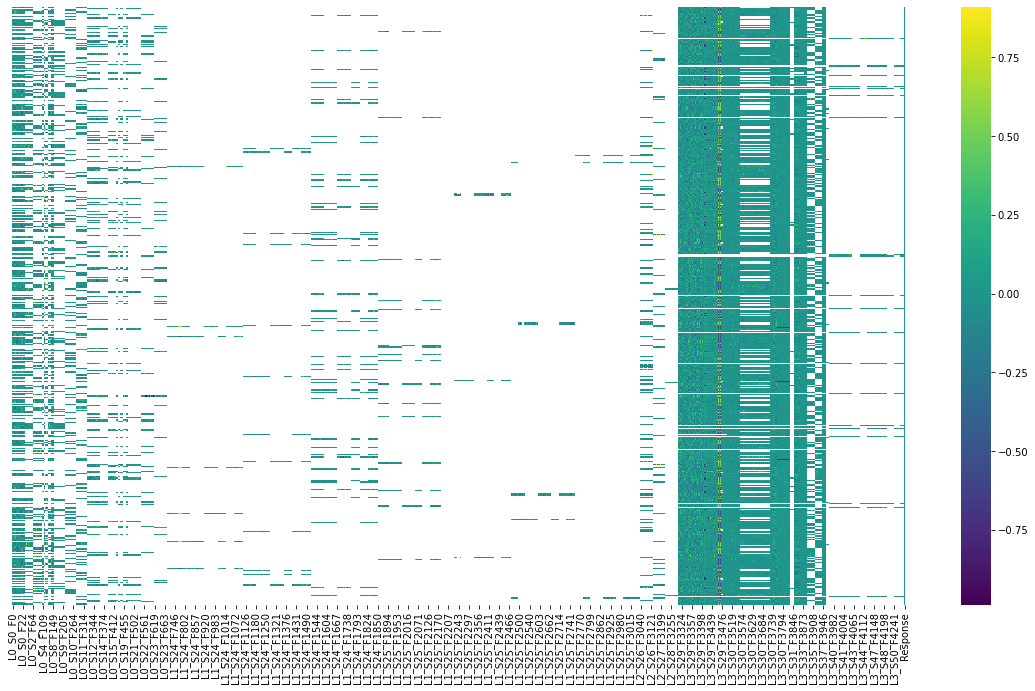

In [11]:
#heatmap 1 for first 100.000 rows in numeric data
plt.figure(figsize = (20,11))
sns.heatmap(pd.read_csv("train_numeric.csv", nrows=100000).iloc[0:500, 1:], 
            yticklabels=False, cbar=True, cmap='viridis')

<AxesSubplot:>

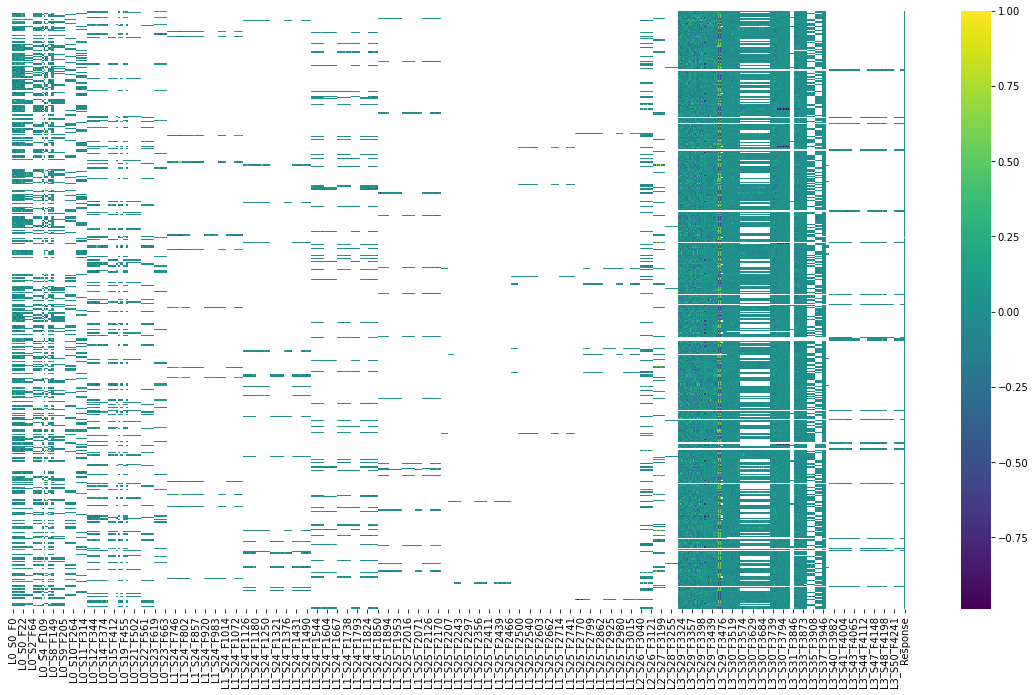

In [12]:
#heatmap 2 for the last 100.000 rows in numeric data
plt.figure(figsize = (20,11))
sns.heatmap(pd.read_csv("train_numeric.csv", 
            skiprows=range(1,1183748-100000+1), nrows=100000).iloc[0:500, 1:], 
            yticklabels=False, cbar=True, cmap='viridis')

Now we have a closer look at the features of date dataset.

In [86]:
train_date=pd.read_csv('train_date.csv', nrows=1)
date_columns=train_date.columns.tolist()
date_columns_unique=np.unique([x[0:6] for x in date_columns])

In [92]:
#number of columns for date data
len(date_columns)

1157

In [87]:
#list of all stations (id omitted)
date_columns_unique[1:]

array(['L0_S0_', 'L0_S10', 'L0_S11', 'L0_S12', 'L0_S13', 'L0_S14',
       'L0_S15', 'L0_S16', 'L0_S17', 'L0_S18', 'L0_S19', 'L0_S1_',
       'L0_S20', 'L0_S21', 'L0_S22', 'L0_S23', 'L0_S2_', 'L0_S3_',
       'L0_S4_', 'L0_S5_', 'L0_S6_', 'L0_S7_', 'L0_S8_', 'L0_S9_',
       'L1_S24', 'L1_S25', 'L2_S26', 'L2_S27', 'L2_S28', 'L3_S29',
       'L3_S30', 'L3_S31', 'L3_S32', 'L3_S33', 'L3_S34', 'L3_S35',
       'L3_S36', 'L3_S37', 'L3_S38', 'L3_S39', 'L3_S40', 'L3_S41',
       'L3_S42', 'L3_S43', 'L3_S44', 'L3_S45', 'L3_S46', 'L3_S47',
       'L3_S48', 'L3_S49', 'L3_S50', 'L3_S51'], dtype='<U6')

In [88]:
#total number of stations, ranging from station 0 to 51
len(date_columns_unique[1:])

52

In [105]:
#first 10 features
[x[3:] for x in date_columns[1:]][0:10]

['S0_D1',
 'S0_D3',
 'S0_D5',
 'S0_D7',
 'S0_D9',
 'S0_D11',
 'S0_D13',
 'S0_D15',
 'S0_D17',
 'S0_D19']

We count features for each station. Station 25 has most features (333). Stations 32 and 46 have the least features (1).

In [109]:
#count features for each station
Counter([x[3:6] for x in date_columns[1:]]).most_common()

[('S25', 333),
 ('S24', 288),
 ('S30', 68),
 ('S29', 63),
 ('S26', 26),
 ('S27', 26),
 ('S28', 26),
 ('S41', 18),
 ('S21', 15),
 ('S22', 15),
 ('S23', 15),
 ('S9_', 13),
 ('S10', 13),
 ('S11', 13),
 ('S0_', 12),
 ('S12', 12),
 ('S47', 11),
 ('S33', 10),
 ('S2_', 9),
 ('S3_', 9),
 ('S14', 9),
 ('S15', 9),
 ('S35', 8),
 ('S36', 8),
 ('S40', 8),
 ('S42', 8),
 ('S43', 8),
 ('S44', 8),
 ('S48', 7),
 ('S49', 7),
 ('S50', 7),
 ('S37', 6),
 ('S6_', 5),
 ('S7_', 5),
 ('S18', 5),
 ('S19', 5),
 ('S34', 5),
 ('S45', 5),
 ('S51', 5),
 ('S8_', 4),
 ('S20', 4),
 ('S31', 4),
 ('S39', 4),
 ('S38', 3),
 ('S1_', 2),
 ('S4_', 2),
 ('S5_', 2),
 ('S13', 2),
 ('S16', 2),
 ('S17', 2),
 ('S32', 1),
 ('S46', 1)]

Date data shows similar patterns, as date data is directly connected to the numeric dataset (date-columns correspond to numeric columns; see dataset description). Timestamps range from close to 0 (purple) up to more than 1600 (yellow) time units. Time units are unknown. Time measures do not drastically change over the course of the production process and stay within their heat-color. There is no visible ordering in data rows, as timestamps can start with either low (purple), medium (cyan) or high values (yellow).

<AxesSubplot:>

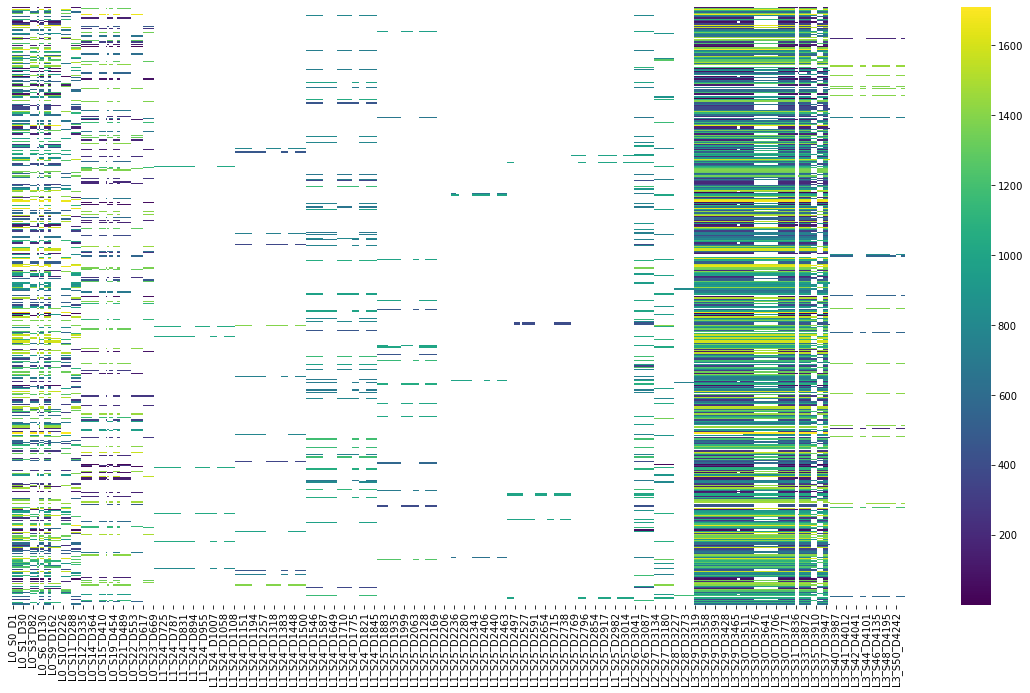

In [111]:
#heatmap 1 for first 100.000 rows in date
plt.figure(figsize = (20,11))
sns.heatmap(pd.read_csv("train_date.csv", nrows=100000).iloc[0:500, 1:], yticklabels=False, cbar=True, cmap='viridis')

Similar patterns as in heatmap 1.

<AxesSubplot:>

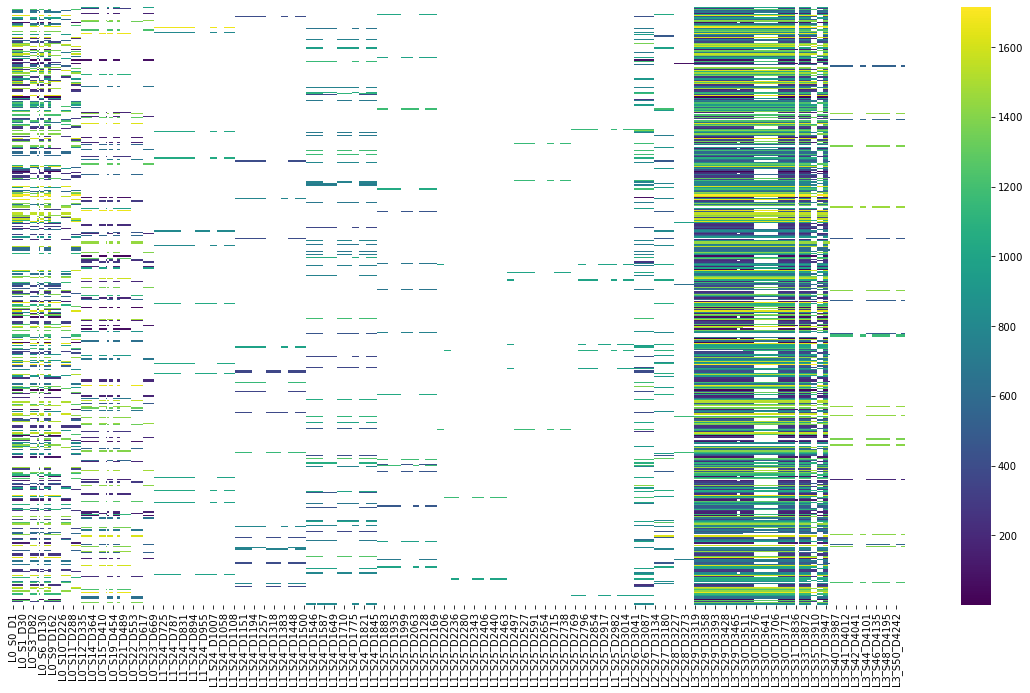

In [113]:
#heatmap 2 for the last 100.000 rows in date
plt.figure(figsize = (20,11))
sns.heatmap(pd.read_csv("train_date.csv", skiprows=range(1,1183748-100000+1), 
                        nrows=100000).iloc[0:500, 1:], yticklabels=False, cbar=True, cmap='viridis')

In [70]:
#create an iterator for date dataset
train_date_chunks=pd.read_csv('train_date.csv', iterator=True, chunksize=100000)

In [57]:
#function for parsing through imported dataframes
def get_data_frame(dataframe):
    for data_frame in dataframe:
        yield data_frame

#create generator object get_df_date for iteration
get_df_date = get_data_frame(train_date_chunks)

df_date_measures = pd.DataFrame({'Start': [], 'End': [], 'Span': []})

df_date=next(get_df_date)

#iterate through date data and sample min, max, span for timestamps
while (df_date.index[-1]<1183746):
    for i in range(0,10):
        row=randrange(df_date.index[0], df_date.index[-1])
        df_date_measures=df_date_measures.append({'Start': df_date.loc[row, 'L0_S0_D1':].describe()['min'], 
                                'End': df_date.loc[row, 'L0_S0_D1':].describe()['max'], 
                                 'Span': abs(df_date.loc[row, 'L0_S0_D1':].describe()['max']-df_date.loc[row, 'L0_S0_D1':].describe()['min'])}, 
                                                ignore_index=True)
    try:
        df_date = next(get_df_date)
    except:
        break

Sampled date data reveals a minimum timestamp for production start of 0.75 and a maximum of 1653.06. 
As for production end, minimum timestamp is 0.79 and maximum is 1659.77. Time spans range from at least 0.04 to 
61.16, where mean span equals 11.21 time units.

However, time units are unknown.

Time values seem to be not normalized.

In [58]:
df_date_measures

,Start,End,Span
0,1001.33,1038.19,36.86
1,46.60,54.53,7.93
2,1413.01,1413.24,0.23
3,907.68,911.58,3.90
4,592.04,603.26,11.22
...,...,...,...
105,678.89,724.92,46.03
106,402.96,406.49,3.53
107,450.34,491.57,41.23
108,1259.96,1263.35,3.39


In [59]:
df_date_measures.describe()

,Start,End,Span
count,110.000000,110.000000,110.000000
mean,861.569000,872.782455,11.213455
std,476.904004,476.807976,14.054967
min,0.750000,0.790000,0.040000
25%,473.665000,494.797500,1.727500
50%,928.450000,937.280000,4.735000
75%,1239.797500,1243.695000,14.707500
max,1653.060000,1659.770000,61.160000


In [13]:
train_categorical=pd.read_csv('train_categorical.csv', nrows=1)
categorical_columns=train_categorical.columns.tolist()
categorical_columns_unique=np.unique([x[0:6] for x in categorical_columns])

In [14]:
#number of columns for categorical data, including id
len(categorical_columns)

2141

In [17]:
#list of categorical stations (Id omitted)
categorical_columns_unique[1:]

array(['L0_S10', 'L0_S11', 'L0_S14', 'L0_S15', 'L0_S16', 'L0_S18',
       'L0_S1_', 'L0_S21', 'L0_S22', 'L0_S23', 'L0_S2_', 'L0_S3_',
       'L0_S4_', 'L0_S6_', 'L0_S9_', 'L1_S24', 'L1_S25', 'L2_S26',
       'L2_S27', 'L2_S28', 'L3_S29', 'L3_S30', 'L3_S31', 'L3_S32',
       'L3_S35', 'L3_S36', 'L3_S38', 'L3_S39', 'L3_S42', 'L3_S43',
       'L3_S44', 'L3_S46', 'L3_S47', 'L3_S49'], dtype='<U6')

In [18]:
#number of columns for categorical data
len(categorical_columns_unique[1:])

34

In [19]:
#first 10 features
[x[3:] for x in categorical_columns[1:]][0:10]

['S1_F25',
 'S1_F27',
 'S1_F29',
 'S1_F31',
 'S2_F33',
 'S2_F35',
 'S2_F37',
 'S2_F39',
 'S2_F41',
 'S2_F43']

Station 24 has most features (660). Station 32 and 46 only have 3 features each.

In [20]:
#count features for each station
Counter([x[3:6] for x in categorical_columns[1:]]).most_common()

[('S24', 660),
 ('S25', 567),
 ('S30', 204),
 ('S29', 63),
 ('S26', 53),
 ('S27', 53),
 ('S28', 53),
 ('S21', 45),
 ('S22', 45),
 ('S9_', 39),
 ('S10', 39),
 ('S47', 33),
 ('S23', 30),
 ('S11', 26),
 ('S42', 24),
 ('S43', 24),
 ('S49', 21),
 ('S2_', 18),
 ('S3_', 18),
 ('S14', 18),
 ('S35', 18),
 ('S6_', 10),
 ('S18', 10),
 ('S15', 9),
 ('S31', 8),
 ('S36', 8),
 ('S39', 8),
 ('S44', 8),
 ('S4_', 6),
 ('S16', 6),
 ('S38', 6),
 ('S1_', 4),
 ('S32', 3),
 ('S46', 3)]

Categorical data has mostly nAn values (yellow). Categorical data (purple) from station 26-28 on line 2 and from station 29 on line 3 corresponds to measurements in date and numeric. Interestingly, there is no categorical data in station 30-37 on line 3. Between station 44 and 49 on line 3 there is a pattern of 3 categorical values with equally sized gaps in between only occuring when there were no previous categorical values in station 29.

<AxesSubplot:>

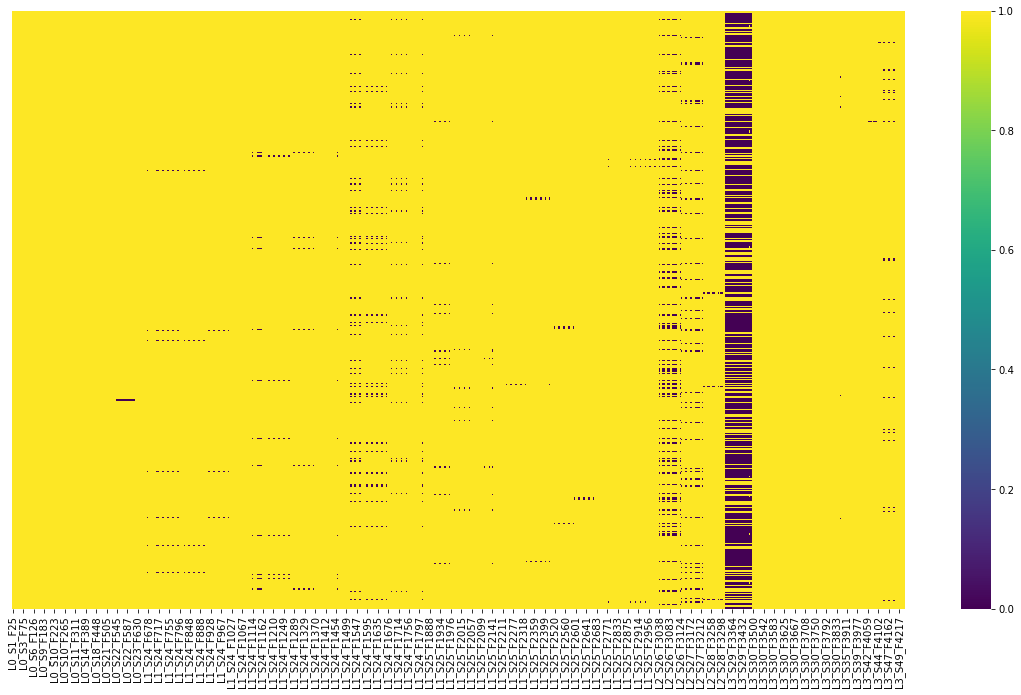

In [23]:
#heatmap 1 for first 100.000 rows in categorical
plt.figure(figsize = (20,11))
sns.heatmap(pd.read_csv("train_categorical.csv", nrows=100000).iloc[0:500, 1:].isnull(), 
            yticklabels=False, cbar=True, cmap='viridis')

C:\Users\Syst3m\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,188,189,190,191,192,193,204,206,207,209,210,212,213,215,216,218,219,221,222,224,225,227,228,230,231,233,234,236,237,239,240,242,243,245,246,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,324,335,336,337,338,339,

<AxesSubplot:>

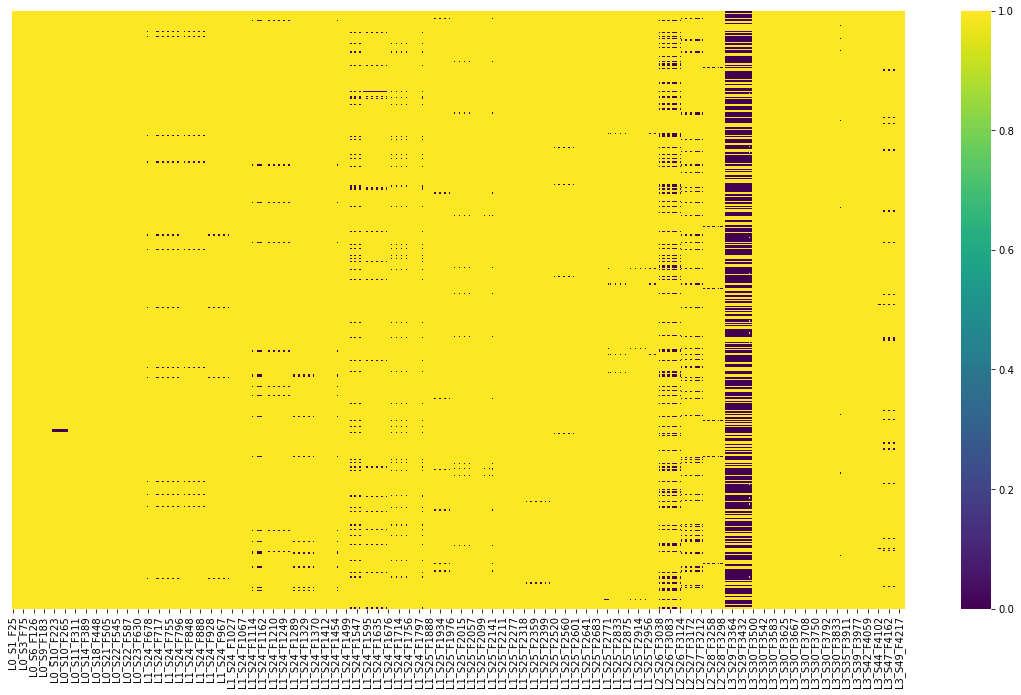

In [26]:
#heatmap 2 for the last 100.000 rows in categorical data
plt.figure(figsize = (20,11))
sns.heatmap(pd.read_csv("train_categorical.csv", skiprows=range(1,1183748-100000+1), 
                        nrows=100000).iloc[0:500, 1:].isnull(), yticklabels=False, cbar=True, cmap='viridis')

In [40]:
#get unique categorical values for the first 100.000 rows
unique_categorical_values=[]

categorical_sample=pd.read_csv('train_categorical.csv', nrows=5000)

for col in categorical_sample.iloc[:,1:]:
    unique_categorical_values.append(categorical_sample[col].unique())
    
categorical_list=[elem for i in unique_categorical_values for elem in i]
mylist = [str(x) for x in categorical_list]
newlist = [x for x in mylist if x != 'nan']
sorted(list(set(newlist)))

C:\Users\Syst3m\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (57,59,60,62,63,65,66,68,69,71,72,74,75,77,78,80,81,83,84,86,87,89,90,92,93,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,204,206,210,212,216,218,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,335,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,464,467,470,473,476,479,482,485,488,491,494,497,500,503,506,509,512,515,518,611,614,617,620,623,626,629,632,635,638,641,644,647,650,653,656,659,662,665,668,671,674,677,680,683,686,689,692,695,698,701,704,707,710,713,716,719,722,

['T-2147482816',
 'T1',
 'T128',
 'T1310',
 'T1372',
 'T143',
 'T145',
 'T16',
 'T16777232',
 'T16777557',
 'T2',
 'T256',
 'T3',
 'T4',
 'T5',
 'T512',
 'T6',
 'T65536',
 'T7',
 'T786432',
 'T8']

In [67]:
#count categorical values for this sample
newlist_counter=Counter(newlist)
newlist_counter_sorted=dict(sorted(newlist_counter.items(), key=lambda pair: pair[1], reverse=True))

In [68]:
for i, x in zip(newlist_counter_sorted, range(1,len(newlist_counter_sorted)+1)):
    newlist_counter_sorted.update({i:x*10})

In [73]:
newlist_counter_sorted.keys()

dict_keys(['T1', 'T16777557', 'T8', 'T4', 'T1372', 'T3', 'T786432', 'T16777232', 'T2', 'T65536', 'T5', 'T145', 'T143', 'T6', 'T7', 'T16', 'T256', 'T128', 'T512', 'T-2147482816', 'T1310'])

In [114]:
cat_sample=pd.read_csv('train_categorical.csv', skiprows=range(1,700), nrows=20)

#for column in cat_sample:
#    for value in column:
#        if value in newlist_counter_sorted.keys():
#            cat_sample[column].replace({value: newlist_counter_sorted[value]}, inplace=True)

In [116]:
cat_sample.iloc[:,500:]

,L1_S24_F966,L1_S24_F967,L1_S24_F969,L1_S24_F971,L1_S24_F972,L1_S24_F974,L1_S24_F976,L1_S24_F977,L1_S24_F979,L1_S24_F981,...,L3_S49_F4225,L3_S49_F4227,L3_S49_F4229,L3_S49_F4230,L3_S49_F4232,L3_S49_F4234,L3_S49_F4235,L3_S49_F4237,L3_S49_F4239,L3_S49_F4240
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,T1,NaN,NaN,T1,NaN,NaN,T1,NaN,NaN,T1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [121]:
cat_sample=pd.read_csv('train_categorical.csv', skiprows=range(1,700), nrows=20)

cat_sample.loc[(x if x in newlist_counter_sorted.keys() for x in cat_sample), cat_sample.columns[1:]]

SyntaxError: invalid syntax (Temp/ipykernel_3564/4035827057.py, line 3)

In [141]:
for column in cat_sample.iloc[:, 1:]: 
    cat_sample[column]=np.where(cat_sample[column] in newlist_counter_sorted.keys(), 
                                newlist_counter_sorted[cat_sample[column]], cat_sample[column])

TypeError: unhashable type: 'Series'